<a href="https://colab.research.google.com/github/rajeshvalluri/MNIST_TF/blob/master/MNIST_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [174]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D
import numpy as np
import pandas as pd
import matplotlib as plt
from scipy import *
from PIL import Image, ImageOps
%matplotlib inline


In [175]:
#Load the MNIST files from Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [176]:
#load Training data into a datalist
data_file = open("//content/gdrive/My Drive/MNIST/mnist_train.csv",'r')
data_list = data_file.readlines()
data_file.close()

In [177]:
input_shape = 784

In [194]:
#Load data and labels into X_train and y_train respectively
X_train = []
y_train = []
for rows in data_list:
  X_train.append(np.asfarray(rows.split(',')[1:]))
  y_train.append(int(rows.split(',')[0]))

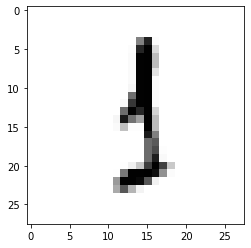

In [195]:
#Check a couple of images and their corresponding labels.
X_train = np.array(X_train)/255.0 + 0.01#scaling input data to be between 0 and 1
y_train = np.array(y_train)
plt.pyplot.imshow(X_train[900].reshape([28,28]),cmap='Greys',interpolation='None')

In [196]:
model = Sequential()
model.add(Dense(units=input_shape,activation=None))
model.add(Dense(units = 100,activation= 'relu'))
model.add(Dropout(0.10))
model.add(Dense(units = 100,activation= 'relu'))
model.add(Dropout(0.10))
model.add(Dense(units=10,activation='softmax'))
opt = tf.keras.optimizers.Adam()
metrics = 'accuracy'
loss = 'sparse_categorical_crossentropy'
model.compile(optimizer=opt,loss=loss,metrics=[metrics])
#model.summary()

In [181]:
print(model.summary)

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fd1d4483080>>


In [197]:
model.fit(x=X_train,y=y_train,verbose=1,epochs=100,batch_size=128)

Epoch 1/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6254 - accuracy: 0.8071
Epoch 2/100
79/79 [==============================] - 0s 3ms/step - loss: 0.2677 - accuracy: 0.9187
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.2038 - accuracy: 0.9377
Epoch 4/100
79/79 [==============================] - 0s 3ms/step - loss: 0.1555 - accuracy: 0.9517
Epoch 5/100
79/79 [==============================] - 0s 3ms/step - loss: 0.1180 - accuracy: 0.9639
Epoch 6/100
79/79 [==============================] - 0s 3ms/step - loss: 0.1016 - accuracy: 0.9670
Epoch 7/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0904 - accuracy: 0.9696
Epoch 8/100
79/79 [==============================] - 0s 2ms/step - loss: 0.0730 - accuracy: 0.9757
Epoch 9/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0686 - accuracy: 0.9762
Epoch 10/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0584 - accuracy: 0.9808
Epoch 11/

In [198]:
#load Training data into a datalist
data_file = open("//content/gdrive/My Drive/MNIST/mnist_test.csv",'r')
data_list = data_file.readlines()
data_file.close()

In [199]:
#Load data and labels into X_test and y_test respectively
X_test = []
y_test = []
for rows in data_list:
  X_test.append(np.asfarray(rows.split(',')[1:]))
  y_test.append(int(rows.split(',')[0]))
X_test = np.array(X_test)/255.0 + 0.01 #scaling test data
y_test = np.array(y_test)

In [200]:
#Evaluate the trained model on test data
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0057 - accuracy: 0.9987


[0.005664172116667032, 0.9987000226974487]

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

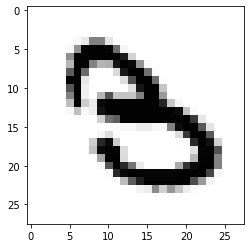

In [229]:
#Check a couple of images and their corresponding labels.
plt.pyplot.imshow(X_test[18].reshape([28,28]),cmap='Greys',interpolation='None')
print(X_test[1458])

In [228]:
pred_image = np.expand_dims(X_test[18], axis=0)
np.argmax(model.predict(pred_image))

3

In [188]:
pip install pillow

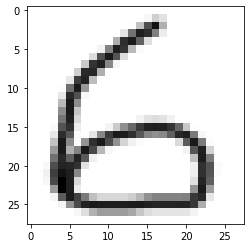

In [242]:
img = Image.open("//content/gdrive/My Drive/MNIST/six_1.jpg")
img = img.convert("L")
img = np.array(img.resize((28,28)))
img = ((255.0 - img.reshape(784))/255.0 * 0.99 ) + 0.01
plt.pyplot.imshow(img.reshape((28,28)),cmap='Greys',interpolation='None')
#print(img)

In [244]:
pred_image = np.expand_dims(img, axis=0)
np.argmax(model.predict(pred_image))
#model.predict(pred_image)

5